In [1]:
import pandas as pd
import numpy as np
import plotly

In [2]:
df = pd.read_csv(r'athlete_events.csv')
region = pd.read_csv(r'noc_regions.csv')

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] == "Summer"]

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

### Medal - Tally

In [8]:
region

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]

In [9]:
df = df.merge(region,on = 'NOC',how='left')

In [10]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [11]:
# All the countries that have participated till now.
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [12]:
df['region'].unique().shape

(206,)

In [13]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [14]:
df.duplicated().sum()

1385

In [15]:
df.drop_duplicates(inplace =True)

In [16]:
df.duplicated().sum()

0

In [17]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [18]:
pd.get_dummies(df['Medal'])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [19]:
df.shape

(221167, 17)

In [20]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [21]:
df.tail(3)

ID                          Name Sex   Age  Height  Weight  \
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

           Team  NOC        Games  Year  Season            City       Sport  \
222549   Russia  RUS  2000 Summer  2000  Summer          Sydney      Rowing   
222550   Russia  RUS  2004 Summer  2004  Summer          Athina      Rowing   
222551  Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal   region notes  Bronze  \
222549  Rowing Men's Lightweight Coxless Fours   NaN   Russia   NaN       0   
222550  Rowing Men's Lightweight Coxless Fours   NaN   Russia   NaN       0   
222551           Basketball Women's Basketball   NaN  Belarus   NaN       0   

        Gold  Silver  
222549     0       0  
222550     0       0  
222551     0       0

In [22]:
df.groupby('NOC').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending = False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

###### Found duplicated rows resulting in medal discrepancy

In [23]:
df[(df['NOC'] == "IND") & (df["Medal"] == "Gold")]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [24]:
Medal_tally = df.drop_duplicates(subset =['Team','NOC',"Games","Year",'City','Sport','Event','Medal'])

In [25]:
Medal_tally.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [26]:
Medal_tally = Medal_tally.groupby('NOC').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending = False).reset_index()

In [27]:
Medal_tally

NOC    Gold  Silver  Bronze
0    USA  1035.0   802.0   708.0
1    URS   394.0   317.0   294.0
2    GBR   278.0   317.0   300.0
3    GER   235.0   261.0   283.0
4    FRA   234.0   256.0   287.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [28]:
Medal_tally["total"] = Medal_tally['Gold'] + Medal_tally['Silver'] + Medal_tally['Bronze']

In [29]:
Medal_tally[Medal_tally["NOC"] =='IND']

NOC  Gold  Silver  Bronze  total
53  IND   9.0     7.0    12.0   28.0

In [30]:
Years = df['Year'].unique().tolist()

In [31]:
Years.sort()

In [32]:
Years.insert(0,"overall")

In [33]:
Years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [34]:
country = np.unique(df['region'].dropna().values).tolist()

In [35]:
country.sort()

In [36]:
country.insert(0,'overall')

In [37]:
def fetch_medal_tally(year,country):
    Medal_df = df.drop_duplicates(subset =['Team','NOC',"Games","Year",'City','Sport','Event','Medal'])
    flag = 0
    if year == 'overall' and country == 'overall':
        temp_df = Medal_df
        
    if year == 'overall' and country != 'overall':
        flag = 1
        temp_df = Medal_df[Medal_df['region'] ==country]
        
    if year != 'overall' and country == 'overall':
        temp_df = Medal_df[Medal_df['Year'] ==int(year)]
        
    if year != 'overall' and country != 'overall':
        temp_df = Medal_df[(Medal_df['Year'] == 2016) & (Medal_df['region']==country)]
        
    if flag == 1:
        X = temp_df.groupby('Year').sum()[["Gold","Silver","Bronze"]].sort_values('Year').reset_index()
    else:
        X = temp_df.groupby('region').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending =False).reset_index()
        
    
    X["total"] = X['Gold'] + X['Silver'] + X['Bronze']
    
    print(X)

In [38]:
fetch_medal_tally(year='overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [39]:
Medal_df = df.drop_duplicates(subset =['Team','NOC',"Games","Year",'City','Sport','Event','Medal'])

In [40]:
Medal_df.head(1)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       City       Sport                        Event Medal region  \
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0

### Overall Analysis
- No of editions
- No of cities
- No of events/sports
- No of atheletes
- No of participating nations


In [41]:
df['Year'].unique().shape[0]-1

28

In [42]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [43]:
df['Sport'].unique().shape

(52,)

In [44]:
df['Event'].unique().shape

(651,)

In [45]:
df['Name'].unique().shape

(116122,)

In [46]:
df['region'].unique().shape

(206,)

In [47]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time

index  Year
28   1896    12
22   1900    31
27   1904    14
26   1906    20
25   1908    22
24   1912    29
23   1920    29
21   1924    45
20   1928    46
19   1932    47
18   1936    49
17   1948    59
16   1952    67
15   1956    71
13   1960    83
11   1964    93
10   1968   111
9    1972   120
12   1976    91
14   1980    80
8    1984   139
7    1988   156
6    1992   168
5    1996   196
4    2000   199
3    2004   200
2    2008   202
1    2012   203
0    2016   204

In [48]:
nations_over_time.rename(columns = {'index':'Edition',"Year":'No of countries'},inplace=True)


In [49]:
nations_over_time

Edition  No of countries
28     1896               12
22     1900               31
27     1904               14
26     1906               20
25     1908               22
24     1912               29
23     1920               29
21     1924               45
20     1928               46
19     1932               47
18     1936               49
17     1948               59
16     1952               67
15     1956               71
13     1960               83
11     1964               93
10     1968              111
9      1972              120
12     1976               91
14     1980               80
8      1984              139
7      1988              156
6      1992              168
5      1996              196
4      2000              199
3      2004              200
2      2008              202
1      2012              203
0      2016              204

In [50]:
import plotly.express as px

In [51]:
fig = px.line(nations_over_time,x='Edition',y="No of countries")
fig.show()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
x = df.drop_duplicates(['Year','Event','Sport'])

In [54]:
x.pivot_table(index="Sport",columns='Year',values="Event",aggfunc="count").fillna(0).astype(int)

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

<AxesSubplot:xlabel='Year', ylabel='Sport'>

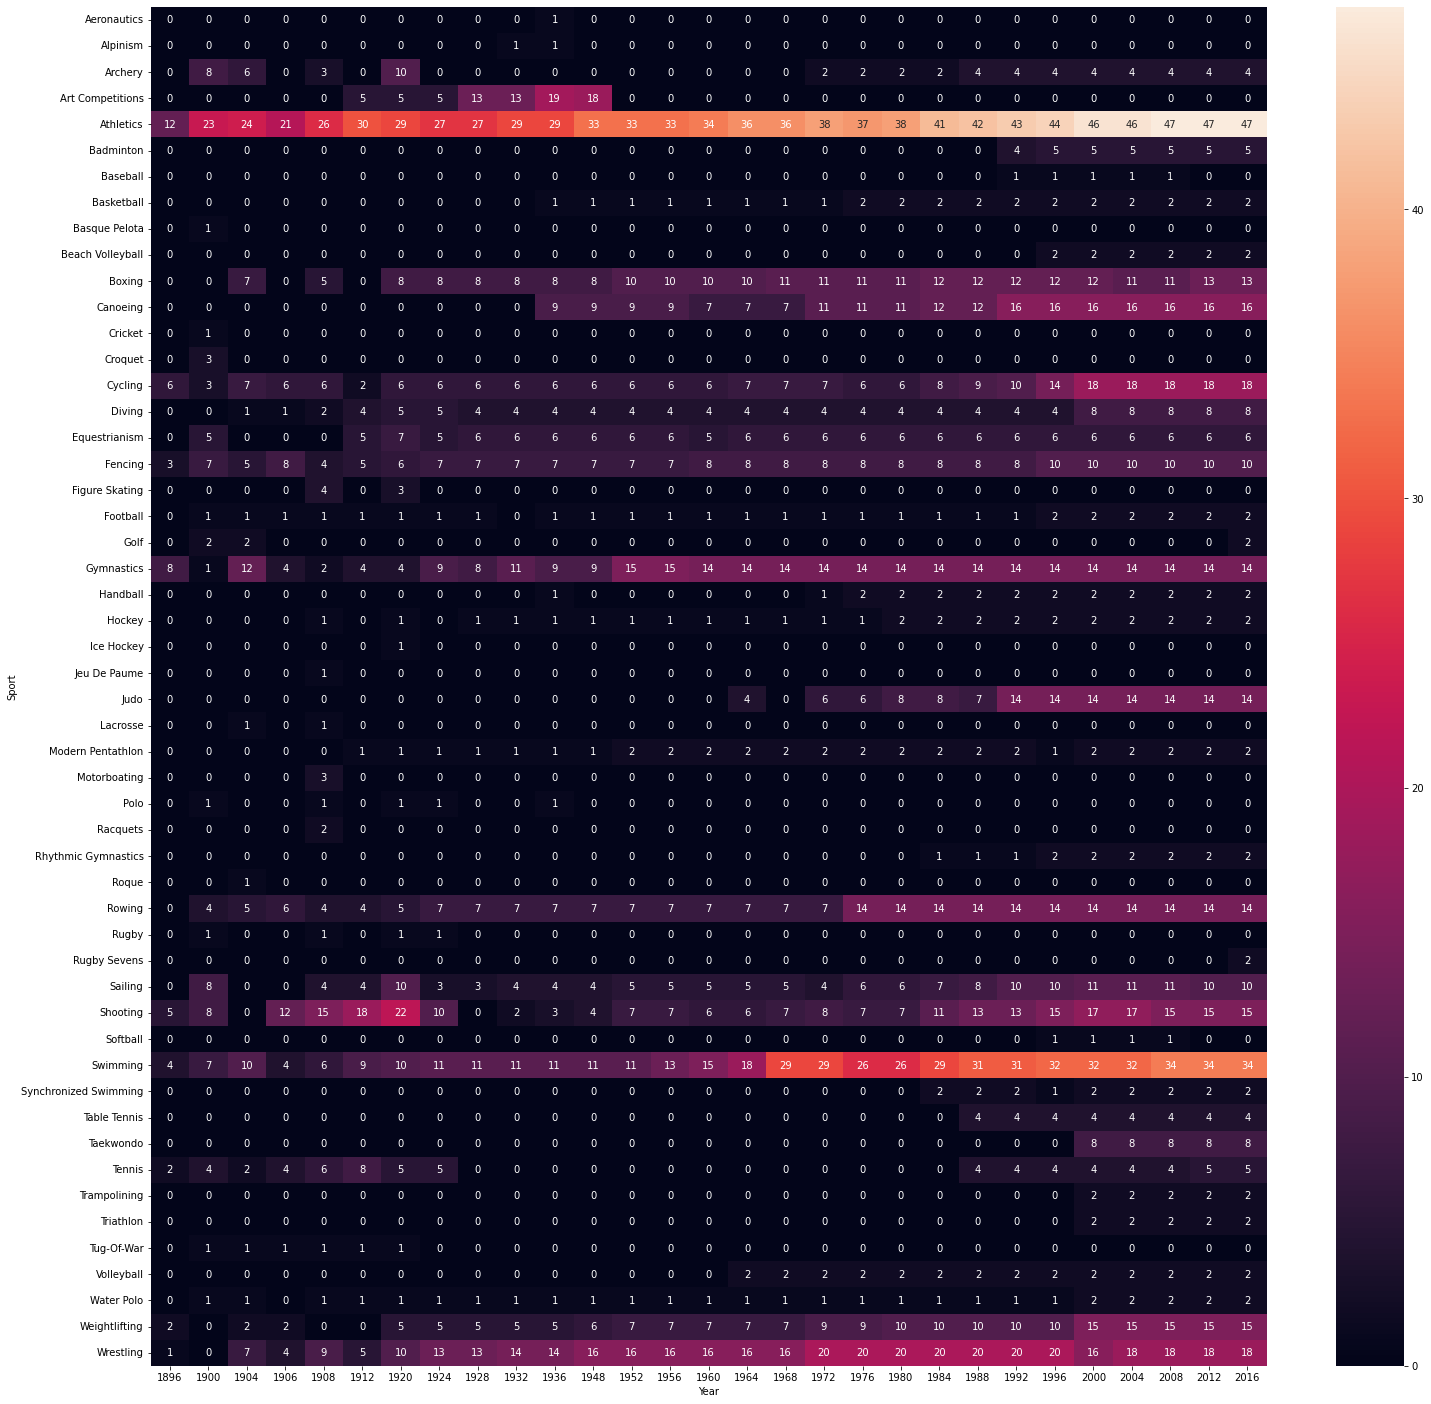

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index="Sport",columns='Year',values="Event",aggfunc="count").fillna(0).astype(int),annot=True)

In [56]:
df.head(1)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       City       Sport                        Event Medal region  \
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0

In [57]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',
                                                       right_on ="Name",how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name',"Name_x":'Medals'},inplace=True)
    return x

In [58]:
most_successful(df,'Gymnastics')

Name  Medals       Sport          region
0    Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
43          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
67                          Takashi Ono      13  Gymnastics           Japan
100                          Sawao Kato      12  Gymnastics           Japan
124             Aleksey Yuryevich Nemov      12  Gymnastics          Russia
145           Viktor Ivanovych Chukarin      11  Gymnastics          Russia
161              Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
179           gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
193       Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
209     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
225         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
244                    Akinori Nakayama      10  Gymnastics           Japan
260       Nadia Elena Comneci (-Conner)       9  Gymnastics         Romania
272           Yury Yevlampiyevich Titov       9  Gymnastics          Russia

### Country wise

- countrywise medal tally per year(line plot)
- What countries are good at heatmap
- Moat ssuccessful atheletes(top 10)

In [59]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\MJ\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
new_df = temp_df[temp_df['region'] =='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [61]:
fig = px.line(final_df,x='Year',y="Medal")
fig.show()

In [62]:
new_df = temp_df[temp_df['region'] =='UK']
new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)

Year               1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  \
Sport                                                                           
Archery             0.0   0.0   0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   
Art Competitions    0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   2.0   1.0   
Athletics           2.0   9.0   2.0   9.0  17.0   8.0  12.0  11.0   5.0   8.0   
Badminton           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Boxing              0.0   0.0   0.0   0.0  14.0   0.0   6.0   4.0   0.0   0.0   
Canoeing            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cricket             0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cycling             2.0   1.0   0.0   5.0   9.0   2.0   5.0   2.0   4.0   2.0   
Diving              0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
Equestrianism       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fencing             0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   
Figure Skating      0.0   0.0   0.0   0.0   6.0   0.0   1.0   0.0   0.0   0.0   
Football            0.0   2.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   
Golf                0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Gymnastics          0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   
Hockey              0.0   0.0   0.0   0.0   4.0   0.0   1.0   0.0   0.0   0.0   
Jeu De Paume        0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   
Judo                0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Lacrosse            0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
Modern Pentathlon   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Motorboating        0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   
Polo                0.0   3.0   0.0   0.0   3.0   0.0   1.0   1.0   0.0   0.0   
Racquets            0.0   0.0   0.0   0.0   6.0   0.0   0.0   0.0   0.0   0.0   
Rowing              0.0   1.0   0.0   0.0   8.0   4.0   2.0   2.0   4.0   2.0   
Rugby               0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
Rugby Sevens        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Sailing             0.0   7.0   0.0   0.0   6.0   0.0   1.0   1.0   0.0   1.0   
Shooting            0.0   0.0   0.0   4.0  21.0   9.0   0.0   3.0   0.0   0.0   
Swimming            0.0   3.0   0.0   5.0   7.0   6.0   2.0   4.0   4.0   2.0   
Taekwondo           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Tennis              3.0  10.0   0.0   0.0  15.0   6.0   6.0   3.0   0.0   0.0   
Trampolining        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Triathlon           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Tug-Of-War          0.0   0.0   0.0   0.0   3.0   1.0   1.0   0.0   0.0   0.0   
Water Polo          0.0   2.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   
Weightlifting       2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Wrestling           0.0   0.0   0.0   0.0  11.0   0.0   2.0   1.0   1.0   0.0   

Year               ...  1980  1984  1988  1992  1996  2000  2004  2008  2012  \
Sport              ...                                                         
Archery            ...   0.0   0.0   1.0   2.0   0.0   0.0   1.0   0.0   0.0   
Art Competitions   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Athletics          ...  10.0  16.0   8.0   6.0   6.0   6.0   4.0   5.0   6.0   
Badminton          ...   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
Boxing             ...   1.0   1.0   1.0   1.0   0.0   1.0   1.0   3.0   5.0   
Canoeing           ...   0.0   0.0   0.0   1.0   0.0   2.0   3.0   3.0   4.0   
Cricket            ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Cycling            ...   0.0   0.0   0.0   1.0   2.0   4.0   4.0  14.0  12.0   
Diving             ...   0.0   0.0   0.0

<AxesSubplot:xlabel='Year', ylabel='Sport'>

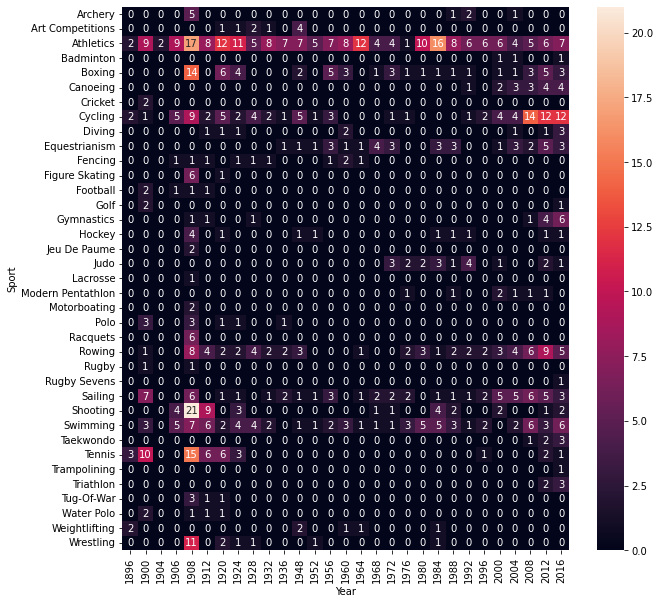

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [64]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',
                                                       right_on ="Name",how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name',"Name_x":'Medals'},inplace=True)
    return x

In [65]:
most_successful(df,'Jamaica')

Name  Medals      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

In [66]:
import plotly.figure_factory as ff

In [67]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [68]:
athelete_df = df.drop_duplicates(subset=['Name','region'])
athelete_df['Age'].dropna()

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222544    19.0
222546    23.0
222548    21.0
222549    24.0
222551    33.0
Name: Age, Length: 110734, dtype: float64

In [69]:
x1 = athelete_df['Age'].dropna()
x2 = athelete_df[athelete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athelete_df[athelete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athelete_df[athelete_df['Medal'] == 'Bronze']['Age'].dropna()

In [70]:
fig = ff.create_distplot([x1,x2,x3,x4],['overall Age','Gold medalist',"Silver medalist",'Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [102]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
        temp_df = athelete_df[athelete_df['Sport'] == sport]
        x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
        name.append(sport)

    

In [105]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

In [71]:
athelete_df['Medal'].fillna('No Medal',inplace=True)
import seaborn as sns

<AxesSubplot:xlabel='Weight', ylabel='Height'>

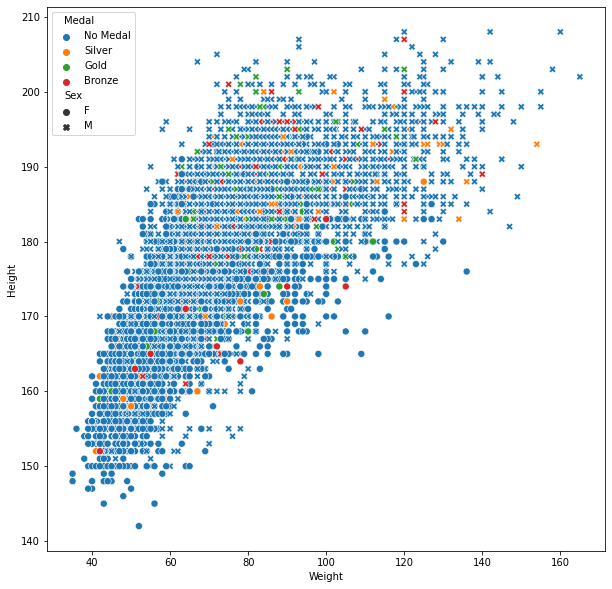

In [83]:
plt.figure(figsize=(10,10))
temp_df = athelete_df[athelete_df['Sport'] == 'Athletics']
sns.scatterplot(x= temp_df['Weight'],y = temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=50)

In [90]:
men = athelete_df[athelete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()

women = athelete_df[athelete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()





In [94]:
final = men.merge(women,on="Year",how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [96]:
final.fillna(0,inplace=True)

In [97]:
fig = px.line(final,x='Year',y=['Male','Female'])
fig.show()